In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import datasets

## 混合tweets和phrasebank数据

In [26]:
# # 读取三个CSV文件
# df1 = pd.read_csv('data/Sentences_AllAgree.csv')
# df2 = pd.read_csv('data/tweets_train_data.csv')
# df3 = pd.read_csv('data/tweets_valid_data.csv')
# 
# # Replace 'man' with 1 and 'woman' with 2 in the 'label' column
# df1['label'].replace({'negative': 0, 'positive': 1, 'neutral':2}, inplace=True)
# 
# # 合并数据
# combined_df = pd.concat([df1, df2, df3], ignore_index=True)
# 
# # 打乱数据
# shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
# 
# # 保存到新的CSV文件
# shuffled_df.to_csv('combined_shuffled.csv', index=False)

## 对数据进行可视化

label
neutral     1391
positive     570
negative     303
Name: count, dtype: int64


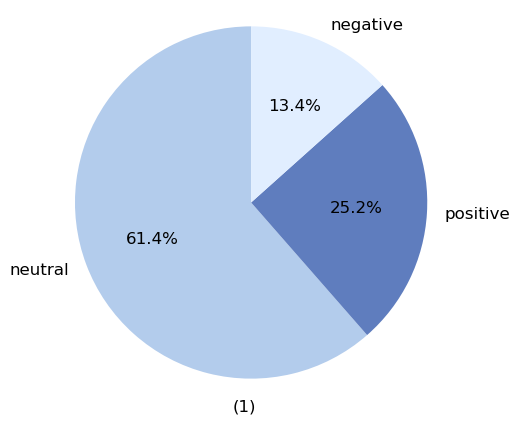

In [5]:
train_dataset = pd.read_csv("./data/Sentences_AllAgree.csv")
# 统计'label'列中每个值的出现次数
label_counts = train_dataset['label'].value_counts()
# 打印统计结果
print(label_counts)
# 绘制饼状图
plt.figure(figsize=(5, 5))  # 设置图形的显示大小
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=["#B3CCEC","#5F7DBE","#E1EEFF"], textprops={'fontsize': 12})
plt.axis('equal')  # 确保饼图是圆形的
plt.suptitle('(1)', y=0.1)
plt.show()


label
2    6178
1    1923
0    1442
Name: count, dtype: int64


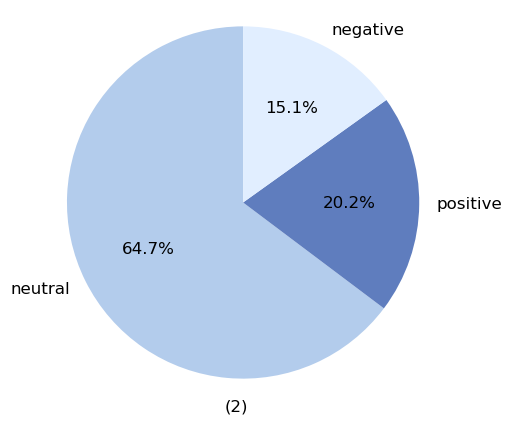

In [28]:
train_data = datasets.load_dataset('zeroshot/twitter-financial-news-sentiment', split='train')
# 统计'label'列中每个值的出现次数
df_train_data = pd.DataFrame(train_data)
label_counts = df_train_data['label'].value_counts()
# 打印统计结果
print(label_counts)
# 绘制饼状图
plt.figure(figsize=(5, 5))  # 设置图形的显示大小
plt.pie(label_counts, labels=["neutral", "positive", "negative"], autopct='%1.1f%%', startangle=90, colors=["#B3CCEC","#5F7DBE","#E1EEFF"], textprops={'fontsize': 12})
plt.axis('equal')  # 确保饼图是圆形的
plt.suptitle('(2)', y=0.1)
plt.show()

## 测试股价接口

In [3]:
# import yfinance as yf
# stock = yf.Ticker("TSLA")
# df_stock = stock.history(start="2024-01-01", end="2024-01-07")
# df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,0.0,0.0
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,0.0,0.0
2024-01-04 00:00:00-05:00,239.250000,242.699997,237.729996,237.929993,102629300,0.0,0.0
2024-01-05 00:00:00-05:00,236.860001,240.119995,234.899994,237.490005,92379400,0.0,0.0


## 根据RoBERTa模型的输出日志，画loss变化图

In [29]:
# pretraining = ''
# with open('condor_pretraining.out', 'r', encoding='utf-8') as file:
#     for line in file:
#         if line.startswith("{'eval_loss':"):
#             pretraining = pretraining + line.strip()
# pretraining

In [30]:
# # Regular expression to match the pattern of the data
# pattern = r"{'eval_loss': (\d+\.\d+), 'eval_runtime': \d+\.\d+, 'eval_samples_per_second': \d+\.\d+, 'eval_steps_per_second': \d+\.\d+, 'epoch': (\d+\.\d+)}"
# 
# # Find all matches in the string
# matches = re.findall(pattern, pretraining)
# 
# # Create a dictionary with epoch as the key and eval_loss as the value
# loss_dict = {float(epoch): float(loss) for loss, epoch in matches}
# 
# loss_dict

In [31]:
# # Extracting keys (epochs) and values (eval_loss) from the dictionary
# epochs = list(loss_dict.keys())
# eval_losses = list(loss_dict.values())
# 
# # Plotting the line chart
# plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
# plt.plot(epochs, eval_losses, marker='o', linestyle='-')
# 
# # Adding title and labels
# plt.title('Evaluation Loss over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Evaluation Loss')
# 
# # Displaying the grid
# plt.grid(True)
# 
# # Showing the plot
# plt.show()

In [32]:
# tweets = ''
# with open('condor_phraseBank.out', 'r', encoding='utf-8') as file:
#     for line in file:
#         tweets = tweets + line.strip() + '\n'
# tweets

In [33]:
# # Split the text into lines
# lines = tweets.split('\n')
# 
# # Initialize lists to store the values
# epochs = []
# losses = []
# mcc_values = []
# acc_values = []
# f1_values = []
# 
# # Loop through the lines to extract the values
# for line in lines:
#     if "epoch" in line:
#         epoch = int(line.split()[1])
#         epochs.append(epoch)
#     elif "{'mcc'" in line:
#         mcc = float(line.split("'mcc': ")[1].split(',')[0])
#         mcc_values.append(mcc)
#         acc = float(line.split("'acc': ")[1].split(',')[0])
#         acc_values.append(acc)
#         f1 = float(line.split("'f1': ")[1].split('}')[0])
#         f1_values.append(f1)
# 
# # Create a DataFrame
# df = pd.DataFrame({
#     'Epoch': epochs,
#     'MCC': mcc_values,
#     'ACC': acc_values,
#     'F1': f1_values
# })
# 
# print(df)

In [34]:
# # Plotting MCC
# plt.figure(figsize=(10, 6))
# plt.plot(df['Epoch'], df['MCC'], label='MCC',color = '#5375CD')
# 
# # Plotting ACC
# plt.plot(df['Epoch'], df['ACC'], label='ACC', color = '#A066B2')
# 
# # Plotting F1
# plt.plot(df['Epoch'], df['F1'], label='F1', color = '#FF8A73')
# 
# plt.xlabel('Epoch')
# plt.ylabel('Score')
# plt.title('Performance Metrics in Every Epoch')
# plt.legend()
# plt.grid(True)
# plt.show()

## 混淆矩阵绘图
混淆矩阵+计算F1-Scores

In [31]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=None, normalize=True):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0d}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 12)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.suptitle(title, y=-0.02, fontsize=12)
    plt.show()
    
    
def calculate_f1_scores(confusion_matrix):
    # Extracting true positives, false positives, and false negatives
    TP = np.diag(confusion_matrix)
    FP = np.sum(confusion_matrix, axis=0) - TP
    FN = np.sum(confusion_matrix, axis=1) - TP
    TN = np.sum(confusion_matrix) - (FP + FN + TP)
    
    # Avoid division by zero
    precision = np.divide(TP, TP + FP, out=np.zeros_like(TP, dtype=float), where=(TP + FP) != 0)
    recall = np.divide(TP, TP + FN, out=np.zeros_like(TP, dtype=float), where=(TP + FN) != 0)
    
    # F1 Score for each class
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Adding a small epsilon to avoid division by zero
    
    # Macro F1: Average of F1 scores across all classes
    macro_f1 = np.mean(f1_scores)
    
    # Micro F1: Calculate global precision, recall, and then F1
    micro_precision = np.sum(TP) / (np.sum(TP) + np.sum(FP))
    micro_recall = np.sum(TP) / (np.sum(TP) + np.sum(FN))
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall + 1e-10)
    
    return micro_f1, macro_f1



## RoBERTa-Large - tweets 混淆矩阵

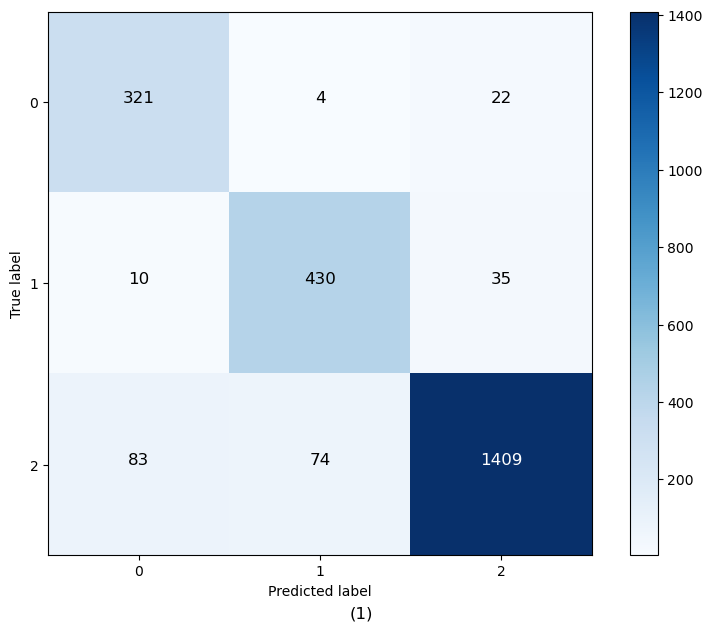

Micro-F1 Score: 0.9045226130153267
Macro-F1 Score: 0.8826397233332767


In [32]:
cm = np.array([[ 321,4,22],[10,430,35],[83,74,1409]])
plot_confusion_matrix(cm, title="(1)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## RoBERTa-Large phrasebank 混淆矩阵

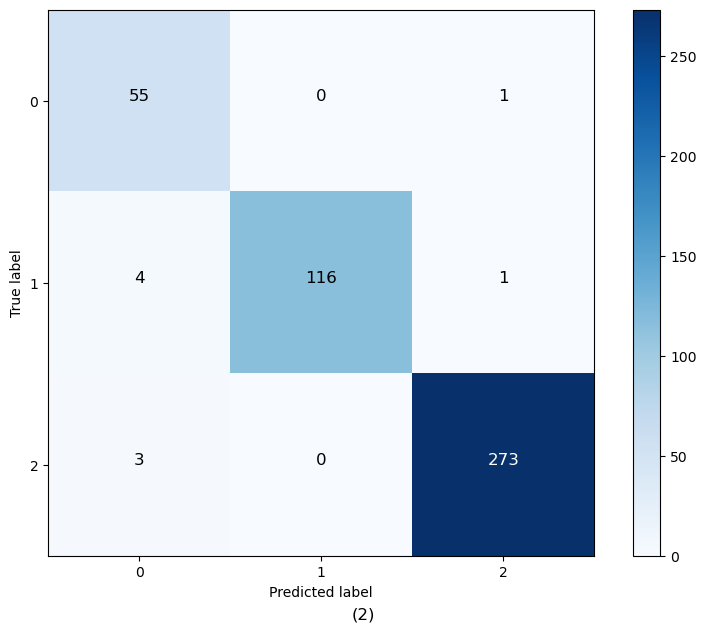

Micro-F1 Score: 0.9801324502811258
Macro-F1 Score: 0.9673439777012729


In [34]:
cm = np.array([[55, 0, 1], [4, 116, 1],[3, 0, 273]])
plot_confusion_matrix(cm, title="(2)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## Llama2-7B-origin tweets

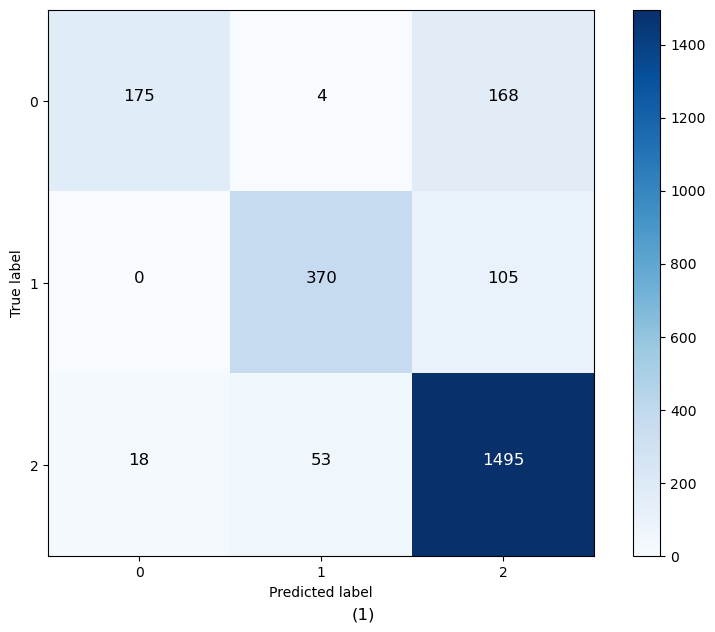

Micro-F1 Score: 0.8542713567339196
Macro-F1 Score: 0.7884559656524684


In [35]:
cm = np.array([[175, 4, 168],[0, 370, 105],[18, 53, 1495]])
plot_confusion_matrix(cm, title="(1)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## Llama2-7B-MLP tweets

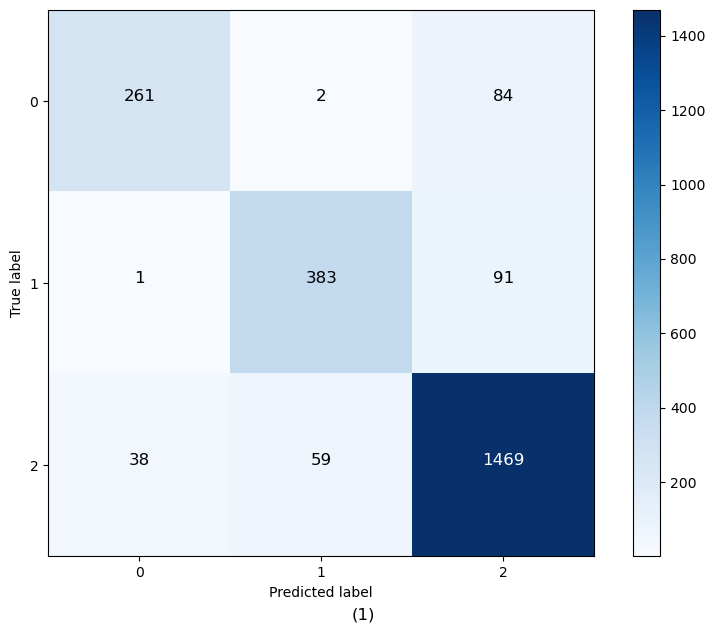

Micro-F1 Score: 0.8848408709717756
Macro-F1 Score: 0.8518600351588216


In [36]:
cm = np.array([[261, 2, 84],[1, 383, 91],[38, 59, 1469]])
plot_confusion_matrix(cm, title="(1)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## Llama2-7B-origin phrasebank

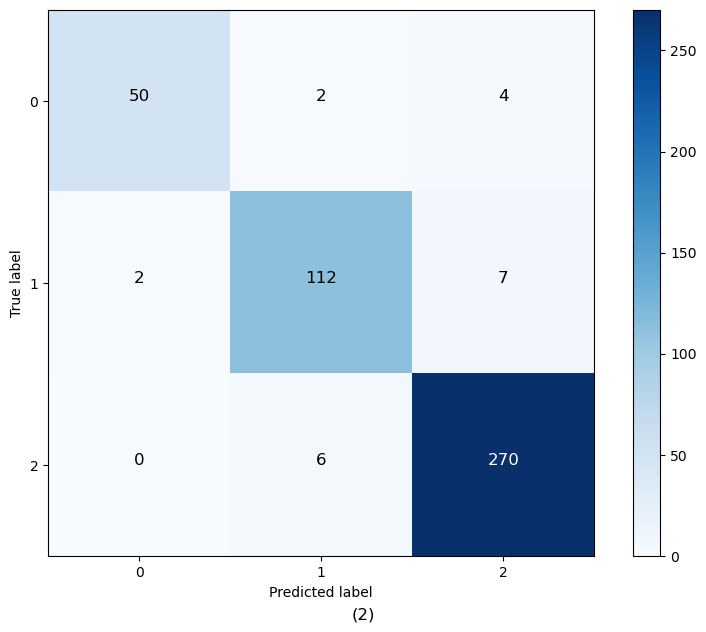

Micro-F1 Score: 0.9536423840559602
Macro-F1 Score: 0.9416219534564311


In [37]:
cm = np.array([[50, 2, 4],[2, 112, 7],[0, 6, 270]])
plot_confusion_matrix(cm, title="(2)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## Llama2-7B phrasebank

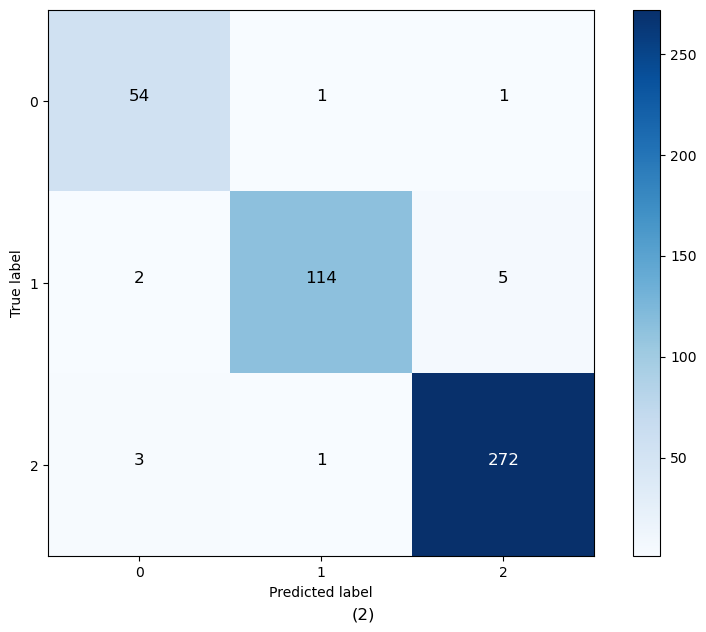

Micro-F1 Score: 0.9713024282060706
Macro-F1 Score: 0.9610350698573721


In [60]:
cm = np.array([[54, 1, 1],[2, 114, 5],[3, 1, 272]])
plot_confusion_matrix(cm, title="(2)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## Mixed Data - RoBERTa

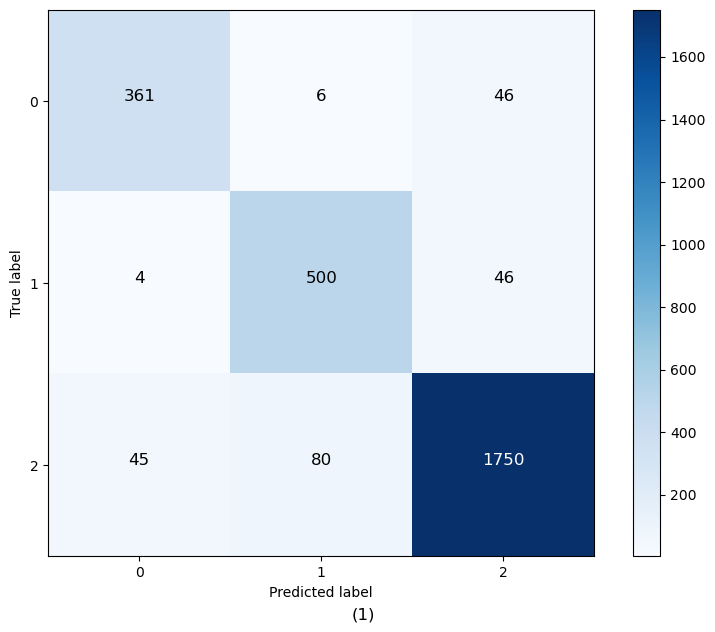

Micro-F1 Score: 0.9200140943826991
Macro-F1 Score: 0.899726508660683


In [40]:
cm = np.array([[361, 6, 46],[4, 500, 46],[45, 80, 1750]])
plot_confusion_matrix(cm, title="(1)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## Mixed Data - Llama2

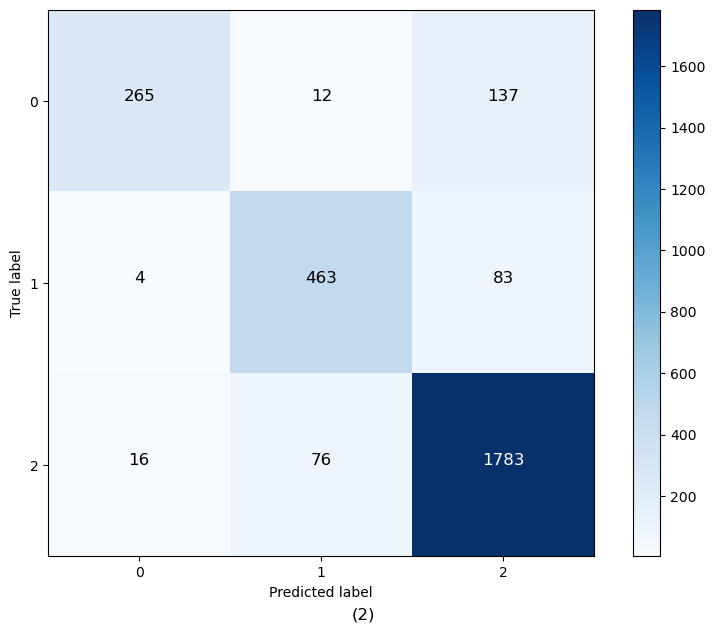

Micro-F1 Score: 0.8844663613448573
Macro-F1 Score: 0.8396085941695501


In [39]:
cm = np.array([[265, 12, 137],[4, 463, 83],[16, 76, 1783]])
plot_confusion_matrix(cm, title="(2)")
micro_f1, macro_f1 = calculate_f1_scores(cm)
print("Micro-F1 Score:", micro_f1)
print("Macro-F1 Score:", macro_f1)

## 展示RoBERTa与Llama2 f1-score

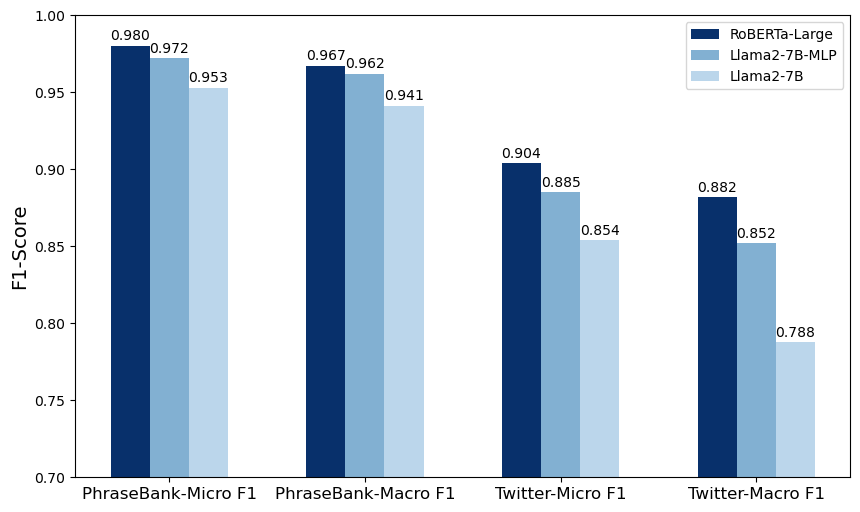

In [4]:
model_class = ['PhraseBank-Micro F1', 'PhraseBank-Macro F1', 
               'Twitter-Micro F1', 'Twitter-Macro F1']
result_RoBERTa = [ 0.980, 0.967, 0.904, 0.882]
result_Llama2_7b_mlp = [0.972, 0.962, 0.885, 0.852]
result_Llama2_7b = [0.953, 0.941, 0.854, 0.788]

x = np.arange(len(model_class))  # x轴刻度标签位置
width = 0.2  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.figure(figsize=(10,6))
# Creating bar chart
bar1 = plt.bar(x - width, result_RoBERTa, label='RoBERTa-Large', color='#08306b', width=0.2)
bar2 = plt.bar(x , result_Llama2_7b_mlp, label='Llama2-7B-MLP', color='#82B0D2', width=0.2)
bar3 = plt.bar(x + width, result_Llama2_7b, label='Llama2-7B', color='#bbd6eb', width=0.2)
# plt.bar([i + 0.3 for i in range(len(model_class))], result_Llama2_7b, label='Llama2-7B', color='#A5DEF1', width=0.3)

# Adding labels and title
# plt.xlabel('Data Source', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.xticks(range(len(model_class)), model_class, fontsize=12)
plt.ylim(0.7, 1)
plt
# Displaying the legend
plt.legend()
# 在每个柱子上方添加数据标签
for bar in bar1 + bar2 + bar3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height*1.002, '{:.3f}'.format(height),
             ha='center', va='bottom')
# Showing the plot
plt.show()

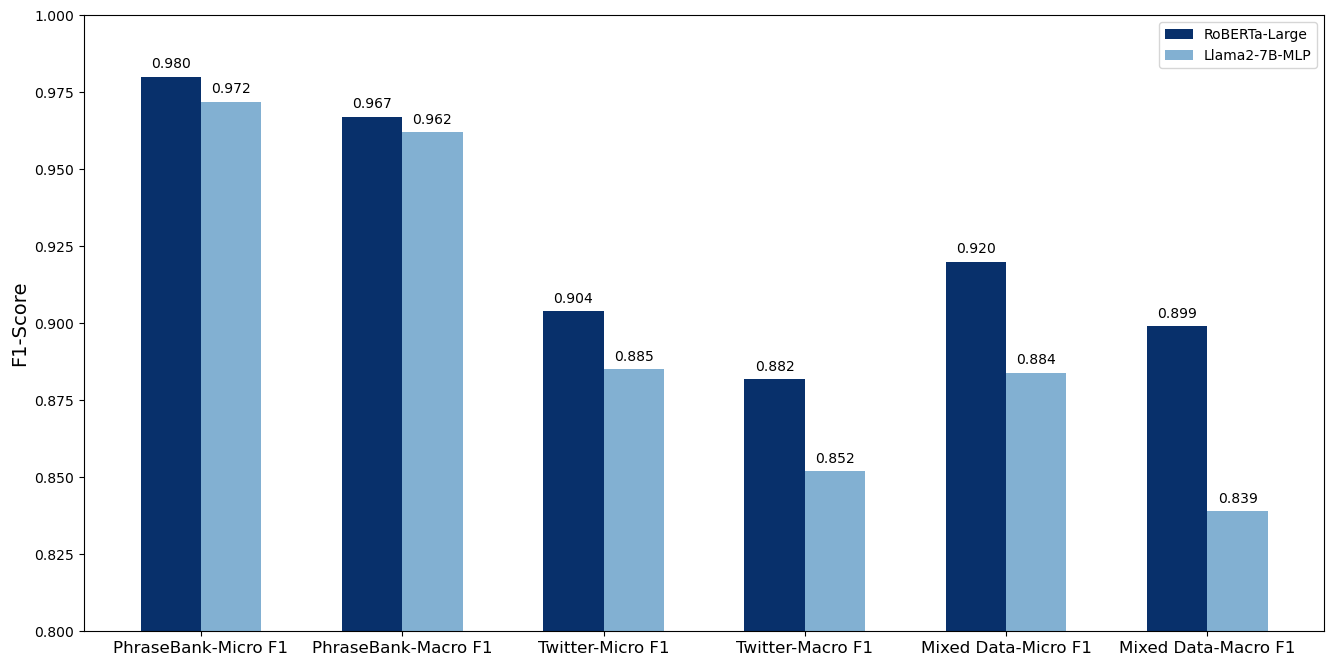

In [5]:
model_class = ['PhraseBank-Micro F1', 'PhraseBank-Macro F1', 
               'Twitter-Micro F1', 'Twitter-Macro F1', 
               'Mixed Data-Micro F1', 'Mixed Data-Macro F1']
result_RoBERTa = [ 0.980, 0.967, 0.904, 0.882, 0.920, 0.899]
result_Llama2_7b_mlp = [0.972, 0.962, 0.885, 0.852, 0.884, 0.839]


x = np.arange(len(model_class))  # x轴刻度标签位置
width = 0.3  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.figure(figsize=(16,8))
# Creating bar chart
bar1 = plt.bar(x - width/2, result_RoBERTa, label='RoBERTa-Large', color='#08306b', width=0.3)
bar2 = plt.bar(x + width/2, result_Llama2_7b_mlp, label='Llama2-7B-MLP', color='#82B0D2', width=0.3)
# plt.bar([i + 0.3 for i in range(len(model_class))], result_Llama2_7b, label='Llama2-7B', color='#A5DEF1', width=0.3)

# Adding labels and title
# plt.xlabel('Data Source', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.xticks(range(len(model_class)), model_class, fontsize=12)
plt.ylim(0.8, 1)
plt
# Displaying the legend
plt.legend()
# 在每个柱子上方添加数据标签
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height*1.002, '{:.3f}'.format(height),
             ha='center', va='bottom')
# Showing the plot
plt.show()

## 排行榜
RoBERTa tweets

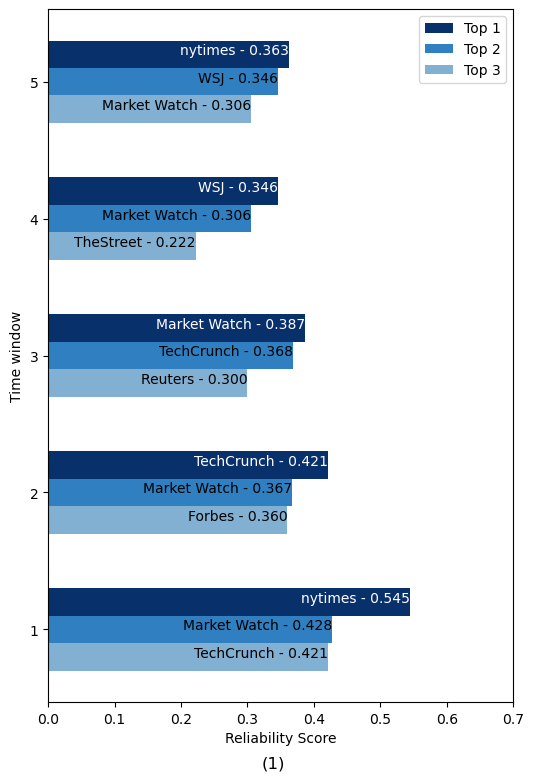

In [53]:
windows = [1,2,3,4,5]
top1 = [0.545, 0.421, 0.387, 0.346, 0.363]
top1_author = ['nytimes', 'TechCrunch', 'Market Watch', 'WSJ', 'nytimes']
top2 = [0.428, 0.367, 0.368, 0.306, 0.346]
top2_author = ['Market Watch', 'Market Watch', 'TechCrunch', 'Market Watch', 'WSJ']
top3 = [0.421, 0.360, 0.300, 0.222, 0.306]
top3_author = ['TechCrunch', 'Forbes', 'Reuters', 'TheStreet', 'Market Watch']

#y轴转换为数值型
num_y = np.arange(len(windows))
#设置同图形的高度
height = 0.2
#计算每个图形高度的起始位置
movie3_start_y = num_y              
movie2_start_y = num_y + height      
movie1_start_y = num_y + 2 * height
plt.figure(figsize=(6,9))
#绘制图形
bar1 = plt.barh(movie1_start_y, top1, height=height, color="#08306b",label="Top 1")
bar2 = plt.barh(movie2_start_y, top2,  height=height, color="#2F7FC1",label="Top 2")
bar3 = plt.barh(movie3_start_y, top3, height=height, color="#82B0D2",label="Top 3")
# 计算宽度值和y轴值，替换y轴数据
plt.yticks(num_y + height, windows)
plt.xlim(0, 0.7)

# 在每个柱子的右侧显示数字
for i, (bar1, bar2, bar3) in enumerate(zip(bar1, bar2, bar3)):
    plt.text(bar1.get_x() + bar1.get_width(), 
             movie1_start_y[i], 
             f'{top1_author[i]} - {bar1.get_width():.3f}', ha='right', color="white")
    plt.text(bar2.get_x() + bar2.get_width(), 
             movie2_start_y[i], 
             f'{top2_author[i]} - {bar2.get_width():.3f}', ha='right')
    plt.text(bar3.get_x() + bar3.get_width(), 
             movie3_start_y[i], 
             f'{top3_author[i]} - {bar3.get_width():.3f}', ha='right')
plt.suptitle("(1)", y=0.05, fontsize=12)
plt.ylabel("Time window")
plt.xlabel("Reliability Score")
plt.legend()
plt.show()


Llama2-7B tweets

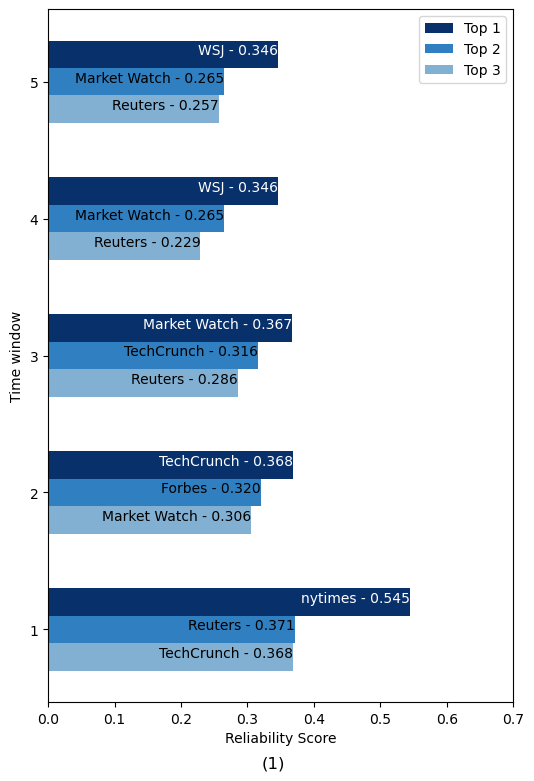

In [55]:
windows = [1,2,3,4,5]
top1 = [0.545, 0.368, 0.367, 0.346, 0.346]
top1_author = ['nytimes', 'TechCrunch', 'Market Watch', 'WSJ', 'WSJ']
top2 = [0.371, 0.320, 0.316, 0.265, 0.265]
top2_author = ['Reuters', 'Forbes', 'TechCrunch', 'Market Watch', 'Market Watch']
top3 = [0.368, 0.306, 0.286, 0.229, 0.257]
top3_author = ['TechCrunch', 'Market Watch', 'Reuters', 'Reuters', 'Reuters']

#y轴转换为数值型
num_y = np.arange(len(windows))
#设置同图形的高度
height = 0.2
#计算每个图形高度的起始位置
movie3_start_y = num_y              
movie2_start_y = num_y + height      
movie1_start_y = num_y + 2 * height
plt.figure(figsize=(6,9))
#绘制图形
bar1 = plt.barh(movie1_start_y, top1, height=height, color="#08306b",label="Top 1")
bar2 = plt.barh(movie2_start_y, top2,  height=height, color="#2F7FC1",label="Top 2")
bar3 = plt.barh(movie3_start_y, top3, height=height, color="#82B0D2",label="Top 3")
# 计算宽度值和y轴值，替换y轴数据
plt.yticks(num_y + height, windows)
plt.xlim(0, 0.7)

# 在每个柱子的右侧显示数字
for i, (bar1, bar2, bar3) in enumerate(zip(bar1, bar2, bar3)):
    plt.text(bar1.get_x() + bar1.get_width(), 
             movie1_start_y[i], 
             f'{top1_author[i]} - {bar1.get_width():.3f}', ha='right', color="white")
    plt.text(bar2.get_x() + bar2.get_width(), 
             movie2_start_y[i], 
             f'{top2_author[i]} - {bar2.get_width():.3f}', ha='right')
    plt.text(bar3.get_x() + bar3.get_width(), 
             movie3_start_y[i], 
             f'{top3_author[i]} - {bar3.get_width():.3f}', ha='right')
plt.suptitle("(1)", y=0.05, fontsize=12)
plt.ylabel("Time window")
plt.xlabel("Reliability Score")
plt.legend()
plt.show()

RoBERTa-Large seekingAlpha

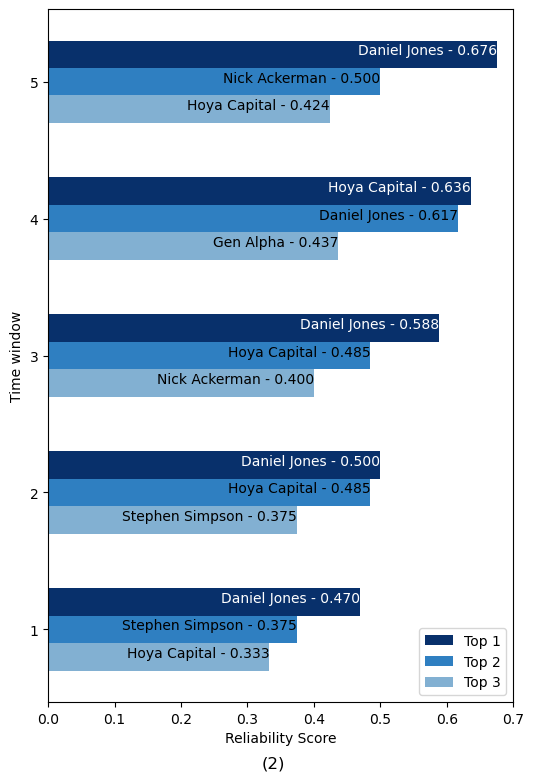

In [58]:
windows = [1,2,3,4,5]
top1 = [0.470, 0.5, 0.588, 0.636, 0.676]
top1_author = ['Daniel Jones', 'Daniel Jones', 'Daniel Jones', 'Hoya Capital', 'Daniel Jones']
top2 = [0.375, 0.485, 0.485, 0.617, 0.5]
top2_author = ['Stephen Simpson', 'Hoya Capital', 'Hoya Capital', 'Daniel Jones', 'Nick Ackerman']
top3 = [0.333, 0.375, 0.4, 0.437, 0.424]
top3_author = ['Hoya Capital', 'Stephen Simpson', 'Nick Ackerman', 'Gen Alpha', 'Hoya Capital']

#y轴转换为数值型
num_y = np.arange(len(windows))
#设置同图形的高度
height = 0.2
#计算每个图形高度的起始位置
movie3_start_y = num_y              
movie2_start_y = num_y + height      
movie1_start_y = num_y + 2 * height
plt.figure(figsize=(6,9))
#绘制图形
bar1 = plt.barh(movie1_start_y, top1, height=height, color="#08306b",label="Top 1")
bar2 = plt.barh(movie2_start_y, top2,  height=height, color="#2F7FC1",label="Top 2")
bar3 = plt.barh(movie3_start_y, top3, height=height, color="#82B0D2",label="Top 3")
# 计算宽度值和y轴值，替换y轴数据
plt.yticks(num_y + height, windows)
plt.xlim(0, 0.7)

# 在每个柱子的右侧显示数字
for i, (bar1, bar2, bar3) in enumerate(zip(bar1, bar2, bar3)):
    plt.text(bar1.get_x() + bar1.get_width(), 
             movie1_start_y[i], 
             f'{top1_author[i]} - {bar1.get_width():.3f}', ha='right', color="white")
    plt.text(bar2.get_x() + bar2.get_width(), 
             movie2_start_y[i], 
             f'{top2_author[i]} - {bar2.get_width():.3f}', ha='right')
    plt.text(bar3.get_x() + bar3.get_width(), 
             movie3_start_y[i], 
             f'{top3_author[i]} - {bar3.get_width():.3f}', ha='right')
plt.suptitle("(2)", y=0.05, fontsize=12)
plt.ylabel("Time window")
plt.xlabel("Reliability Score")
plt.legend()
plt.show()

Llama2-7B seekingAlpha

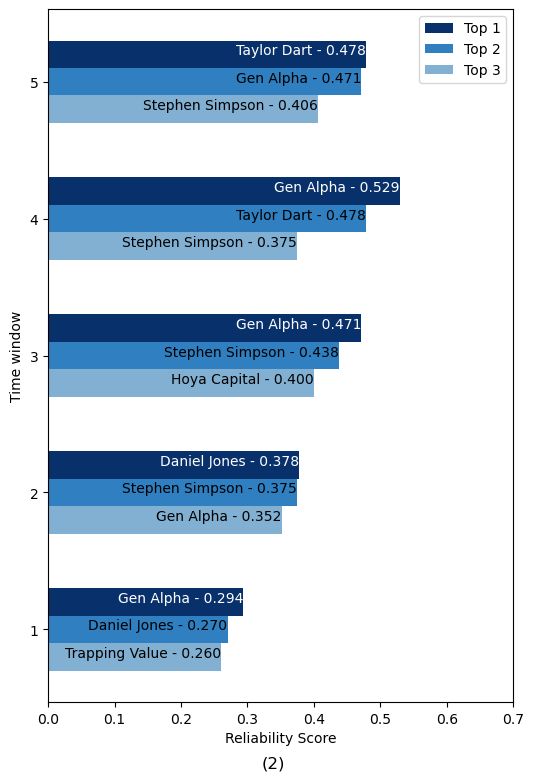

In [59]:
windows = [1,2,3,4,5]
top1 = [0.294, 0.378, 0.471, 0.529, 0.478]
top1_author = ['Gen Alpha', 'Daniel Jones', 'Gen Alpha', 'Gen Alpha', 'Taylor Dart']
top2 = [0.270, 0.375, 0.438, 0.478, 0.471]
top2_author = ['Daniel Jones', 'Stephen Simpson', 'Stephen Simpson', 'Taylor Dart', 'Gen Alpha']
top3 = [0.260, 0.352, 0.4, 0.375, 0.406]
top3_author = ['Trapping Value', 'Gen Alpha', 'Hoya Capital', 'Stephen Simpson', 'Stephen Simpson']

#y轴转换为数值型
num_y = np.arange(len(windows))
#设置同图形的高度
height = 0.2
#计算每个图形高度的起始位置
movie3_start_y = num_y              
movie2_start_y = num_y + height      
movie1_start_y = num_y + 2 * height
plt.figure(figsize=(6,9))
#绘制图形
bar1 = plt.barh(movie1_start_y, top1, height=height, color="#08306b",label="Top 1")
bar2 = plt.barh(movie2_start_y, top2,  height=height, color="#2F7FC1",label="Top 2")
bar3 = plt.barh(movie3_start_y, top3, height=height, color="#82B0D2",label="Top 3")
# 计算宽度值和y轴值，替换y轴数据
plt.yticks(num_y + height, windows)
plt.xlim(0, 0.7)

# 在每个柱子的右侧显示数字
for i, (bar1, bar2, bar3) in enumerate(zip(bar1, bar2, bar3)):
    plt.text(bar1.get_x() + bar1.get_width(), 
             movie1_start_y[i], 
             f'{top1_author[i]} - {bar1.get_width():.3f}', ha='right', color="white")
    plt.text(bar2.get_x() + bar2.get_width(), 
             movie2_start_y[i], 
             f'{top2_author[i]} - {bar2.get_width():.3f}', ha='right')
    plt.text(bar3.get_x() + bar3.get_width(), 
             movie3_start_y[i], 
             f'{top3_author[i]} - {bar3.get_width():.3f}', ha='right')
plt.suptitle("(2)", y=0.05, fontsize=12)
plt.ylabel("Time window")
plt.xlabel("Reliability Score")
plt.legend()
plt.show()

## 误差分析

Mean Squared Error: 0.016000000000000028
Mean Absolute Error: 0.1200000000000001


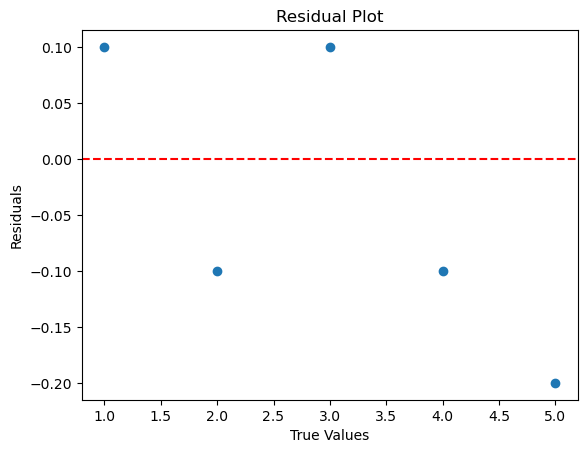

In [47]:
# 真实值和预测值
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 1.9, 3.1, 3.9, 4.8])

# 计算误差
errors = y_pred - y_true

# 计算MSE和MAE
mse = np.mean(errors**2)
mae = np.mean(np.abs(errors))

# 打印结果
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# 绘制残差图
plt.scatter(y_true, errors)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()